#03. PyTorch Computer Vision

Computer vision is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog (binary classification).

Or whether a photo is of a cat, dog or chicken (multi-class classification).

Or identifying where a car appears in a video frame (object detection).

Or figuring out where different objects in an image can be separated (panoptic segmentation).

#Where does computer vision get used?

If you use a smartphone, you've already used computer vision. Camera and photo apps use computer vision to enhance and sort images. Modern cars use computer vision to avoid other cars and stay within lane lines. Manufacturers use computer vision to identify defects in various products. Security cameras use computer vision to detect potential intruders. In essence, anything that can be described in a visual sense can be a potential computer vision problem.

#What we're going to cover in this notebook
We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.
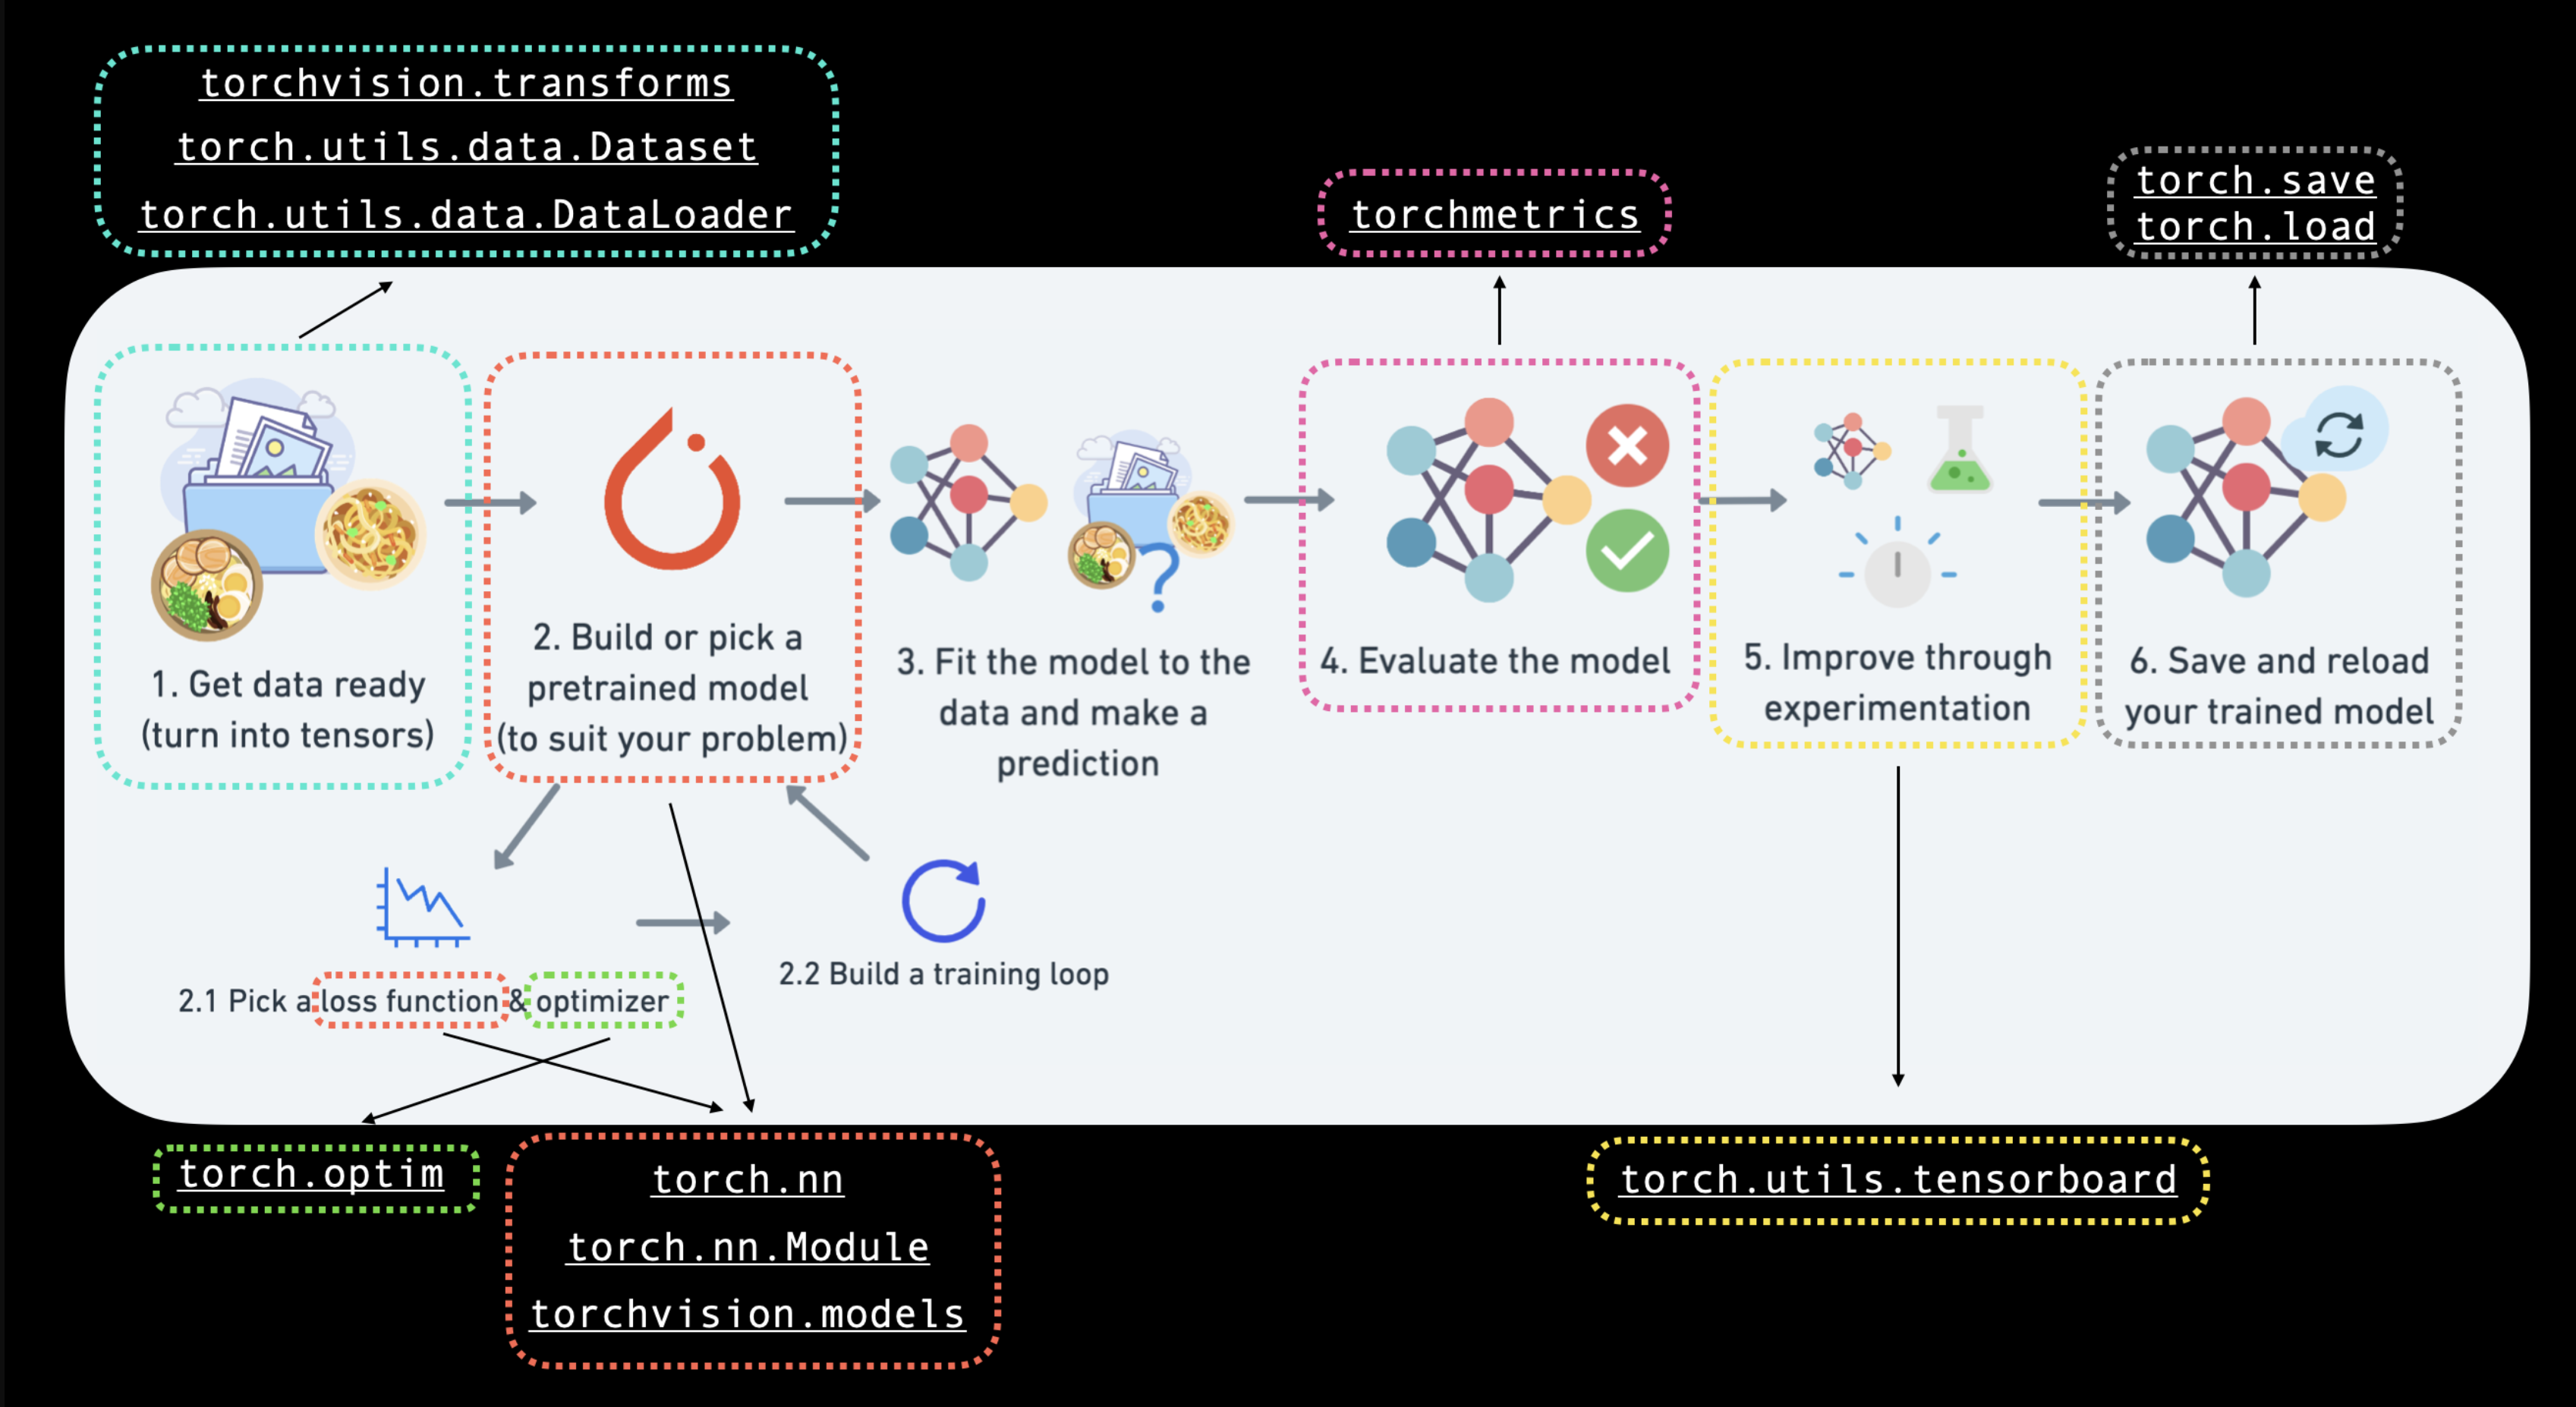

Specifically, we're going to cover the following in this notebook:

**0.Computer vision libraries in PyTorch**
PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.

**1. Load data**
To practice computer vision, we'll start with some images of different pieces of clothing from `FashionMNIST`.

**2. Prepare data**
We've got some images, let's load them in with a `PyTorch DataLoader` so we can use them with our training loop.

**3. Model 0: Building a baseline model**
Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.

**4. Making predictions and evaluating model 0**
Let's make some predictions with our baseline model and evaluate them.

**5. Setup device agnostic code for future models**
It's best practice to write device-agnostic code, so let's set it up.

**6. Model 1: Adding non-linearity**
Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers.

**7. Model 2: Convolutional Neural Network (CNN)**
Time to get computer vision specific and introduce the powerful convolutional neural network architecture.

**8. Comparing our models**
We've built three different models, let's compare them.

**9. Evaluating our best model**
Let's make some predictions on random images and evaluate our best model.

**10. Making a confusion matrix**
A confusion matrix is a great way to evaluate a classification model, let's see how we can make one.

**11. Saving and loading the best performing model**
Since we might want to use our model for later, let's save it and make sure it loads back in correctly.

#0. Computer vision libraries in PyTorch

Some of the most important PyTorch computer vision libraries:

`torchvision`
Contains datasets, model architectures and image transformations often used for computer vision problems.

`torchvision.datasets`
Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of [base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets).

`torchvision.models`
This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.

`torchvision.transforms`
Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.

`torch.utils.data.Dataset`
Base dataset class for PyTorch.

`torch.utils.data.DataLoader`
Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Let's import the relevant dependencies.

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


PyTorch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


#1. Getting a dataset
To begin working on a computer vision problem, let's get a computer vision dataset. We're going to start with FashionMNIST.

MNIST stands for Modified National Institute of Standards and Technology.

[The original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup. Except it contains grayscale images of 10 different kinds of clothing.

Since it has 10 different image classes (different types of clothing), it's a multi-class classification problem. We'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`. Including FashionMNIST in `torchvision.datasets.FashionMNIST()`.

To download it, we provide the following parameters:


*   `root: str` - which folder do you want to download the data to?
*   `train: Bool` - do you want the training or test split?
*   `download: Bool` - should the data be downloaded?
*   `transform: torchvision.transforms` - what transformations would you like to do on the data?
*   `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in torchvision have these parameter options.

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.8MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 244kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.69MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.3MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Let's check out the first sample of the training data.

In [3]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

#1.1 Input and output shapes of a computer vision model

We've got a big tensor of values (the image) leading to a single value for the target (the label).

Let's see the image shape.

In [4]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is [1, 28, 28] or more specifically:

`[color_channels=1, height=28, width=28]`

Having color_channels=1 means the image is grayscale.

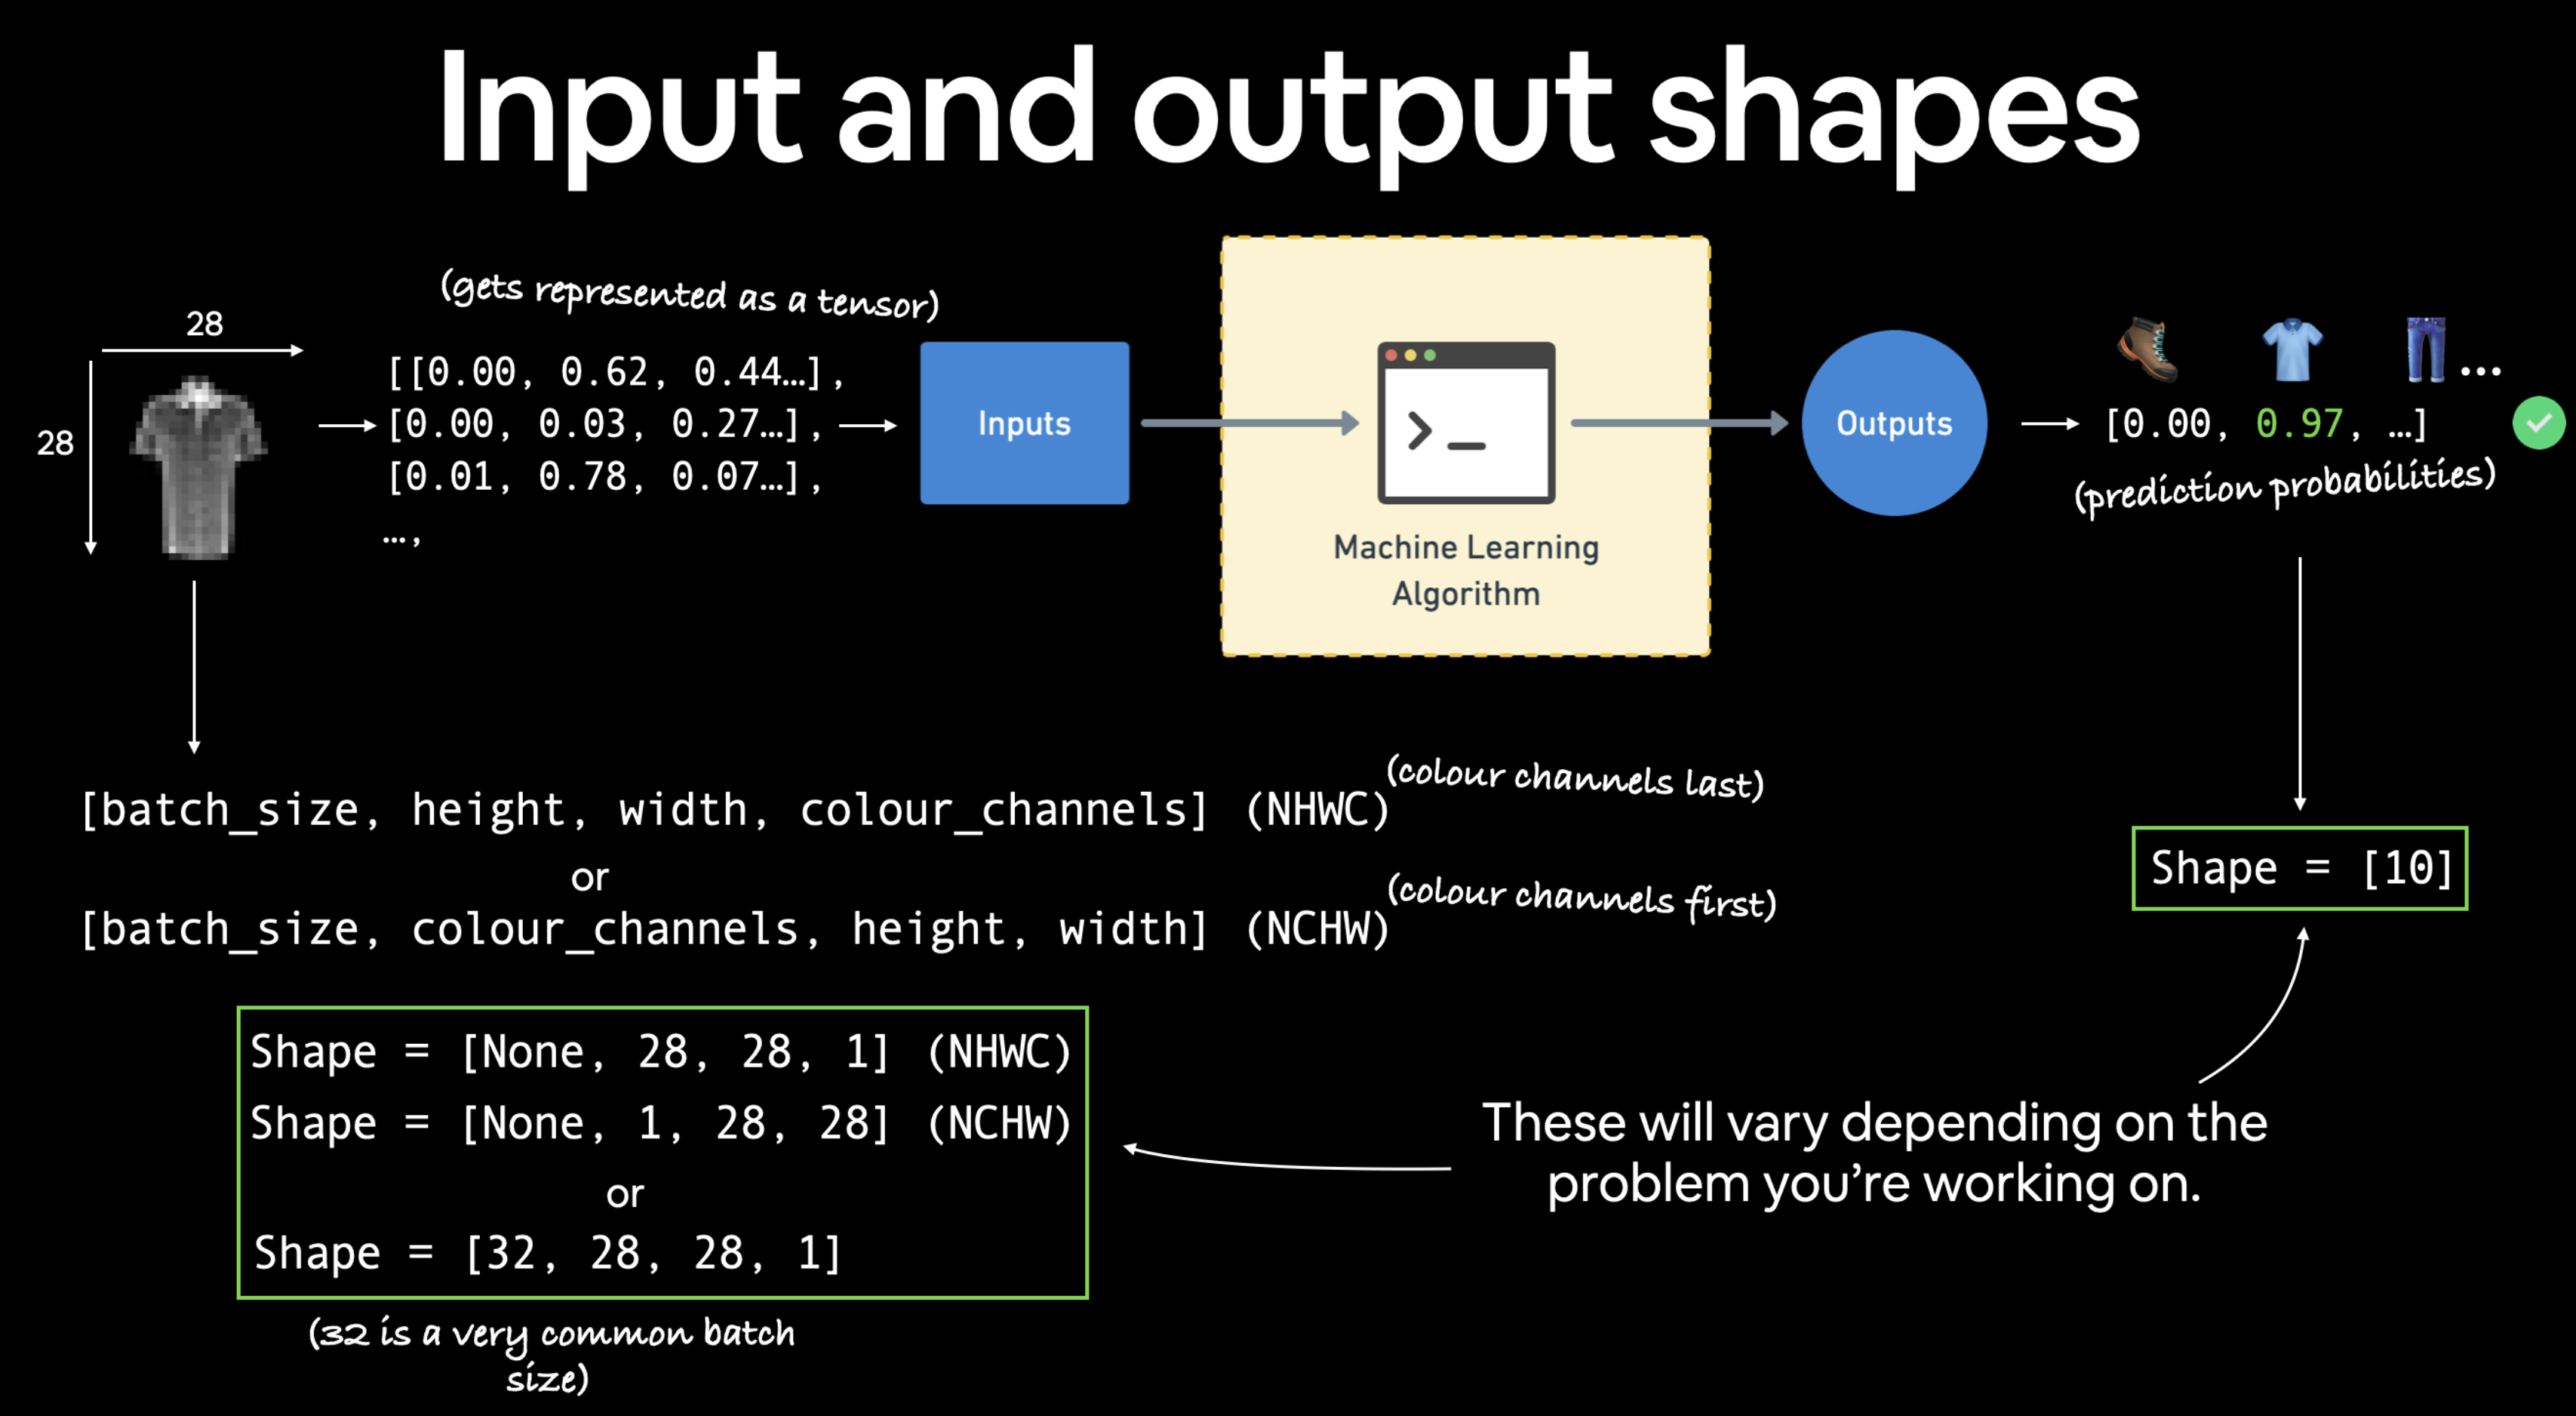


Various problems will have various input and output shapes. But the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.

If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known as the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

Note: You'll also see `NCHW` and `NHWC` formats where N stands for number of images. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators. However, PyTorch also explains that `NHWC` (channels last) performs better and is considered best practice.

For now, since our dataset and models are relatively small, this won't make too much of a difference. But keep it in mind for when working on larger image datasets and using convolutional neural networks.

Let's check out more shapes of our data.

In [6]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

We've got 60,000 training samples and 10,000 testing samples.

What classes are there? We can find these via the `.classes` attribute.

In [7]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

It looks like we're dealing with 10 different kinds of clothes. Because we're working with 10 different classes, it means our problem is **multi-class classification.**

#1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


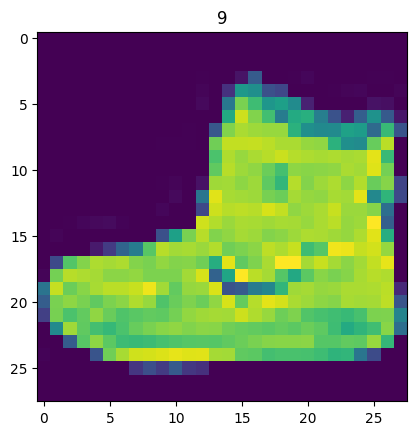

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

Turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.

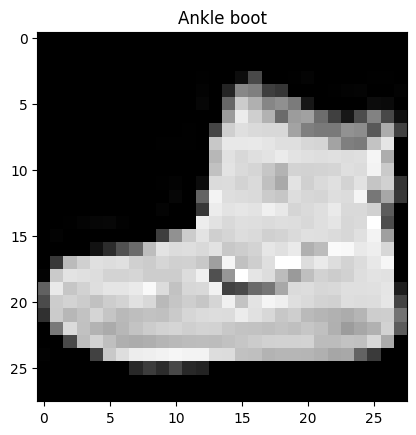

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

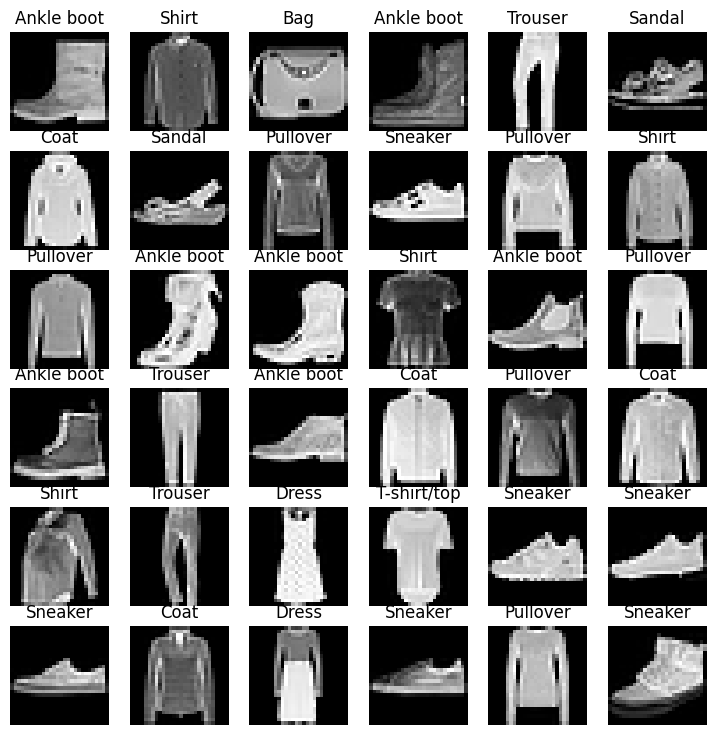

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 6, 6
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

We'll take pixel values and build a model to find patterns in them to use on future pixel values.

Small dataset (yes, even 60,000 images in deep learning is considered quite small)